In [2]:
%matplotlib inline
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn
import sympy as sm
from scipy.integrate import ode,odeint
#import sympy.physics.vector as vc
sm.init_printing()

## Hamiltonian

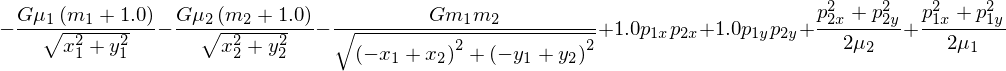

In [26]:
m1,m2,M,mu1,mu2=sm.symbols('m_1,m_2,M,\mu_1,\mu_2', real=True, positive=True)
x1,y1,x2,y2,p1x,p1y,p2x,p2y,p1,p2,r1,r2=sm.symbols('x_1,y_1,x_2,y_2,p_{1x},p_{1y},p_{2x},p_{2y},p_1,p_2,r_1,r_2',real=True, positive=True)
a1,a2,e1,e2=sm.symbols('a_1,a_2,e_1,e_2', real=True, positive=True)
x10,x20,y10,y20,p1x0,p1y0,p2x0,p2y0=sm.symbols('x_{10},x_{20},y_{10},y_{20},p_{1x0},p_{1y0},p_{2x0},p_{2y0}', real=True, positive=True)

G,D=sm.symbols('G,\Delta', real=True, positive=True)
M=1.
p1=sm.sqrt(p1x**2+p1y**2)
p2=sm.sqrt(p2x**2+p2y**2)

r1=sm.sqrt(x1**2+y1**2)
r2=sm.sqrt(x2**2+y2**2)
pp=p1x*p2x+p1y*p2y

D=sm.sqrt((y2-y1)**2+(x2-x1)**2)

H1=p1**2/(2*mu1)-G*(M+m1)*mu1/r1
H2=p2**2/(2*mu2)-G*(M+m2)*mu2/r2
H3=-G*m1*m2/D + pp/M

H=H1+H2+H3
H

## Εξισώσεις κινησεις
$$
\dot{x}_1,\dot{y}_1,\dot{x}_2,\dot{y}_2,\dot{p}_{x1},\dot{p}_{y1},\dot{p}_{x2},\dot{p}_{y2}
$$

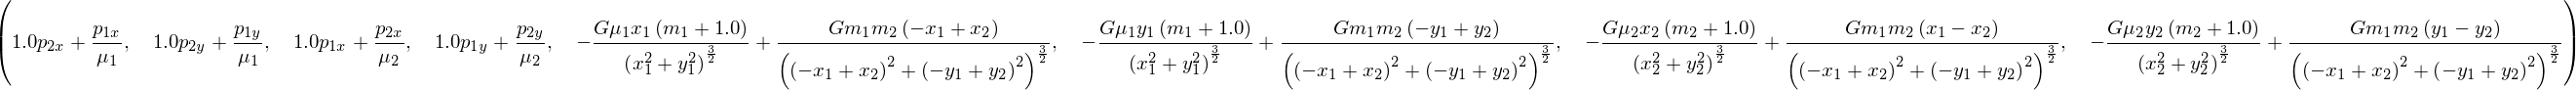

In [164]:
dotx1=H.diff(p1x)
doty1=H.diff(p1y)
dotx2=H.diff(p2x)
doty2=H.diff(p2y)

dotpx1=-H.diff(x1)
dotpy1=-H.diff(y1)

dotpx2=-H.diff(x2)
dotpy2=-H.diff(y2)
dotx1,doty1,dotx2,doty2,dotpx1,dotpy1,dotpx2,dotpy2

In [304]:
#sub={mu1:M*m1/(M+m1),mu2:M*m2/(M+m2),G:4.*np.pi**2,m1:0.01,m2:0.005,M:1.,a1:1.3,a2:2.9,e1:0.1,e2:0.2}
sub={mu1:0.0099009,mu2:0.004975124,G:4.*np.pi**2,m1:0.01,m2:0.005,M:1.,a1:1.3,a2:2.9,e1:0.1,e2:0.2}

In [305]:
dx1 = sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),dotx1.subs(sub),"numpy")
dx2 = sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),dotx2.subs(sub),"numpy")
dy1 = sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),doty1.subs(sub),"numpy")
dy2 = sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),doty2.subs(sub),"numpy")
dpx1 = sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),dotpx1.subs(sub),"numpy")
dpx2 = sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),dotpx2.subs(sub),"numpy")
dpy1 = sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),dotpy1.subs(sub),"numpy")
dpy2 = sm.lambdify((x1,x2,y1,y2,p1x,p2x,p1y,p2y),dotpy2.subs(sub),"numpy")
def dY(y,t):
    a= np.array([
            dx1(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7]),
            dx2(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7]),
            dy1(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7]),
            dy2(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7]),
            dpx1(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7]),
            dpx2(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7]),
            dpy1(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7]),
            dpy2(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7])
        ])
    return a

## Αρχικές συνθήκες
$$
x_{10},y_{10},x_{20},y_{20},p_{x10},p_{y10},p_{x20},p_{y20}
$$

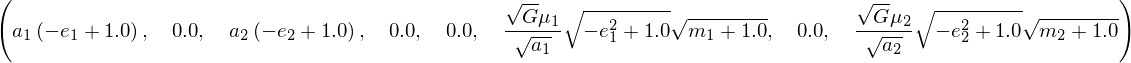

In [314]:
p1x0=0.
p1y0=mu1*sm.sqrt(G*(M+m1)*a1*(1.-e1**2))/a1
p2x0=0.
p2y0=mu2*sm.sqrt(G*(M+m2)*a2*(1.-e2**2))/a2

x10=a1*(1.-e1)
y10=0.
x20=a2*(1.-e2)
y20=0.
x10,y10,x20,y20,p1x0,p1y0,p2x0,p2y0

## Numerical Values

In [315]:
Y0=np.array([x10.subs(sub),
             x20.subs(sub),
             y10,
             y20,
             p1x0,
             p2x0,
             p1y0.subs(sub),
             p2y0.subs(sub)]).astype('float')
Y0

array([ 1.17      ,  2.32      ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.05455834,  0.01803032])

In [325]:
t=np.arange(0,20,0.005)
sol=odeint(dY,Y0,t)

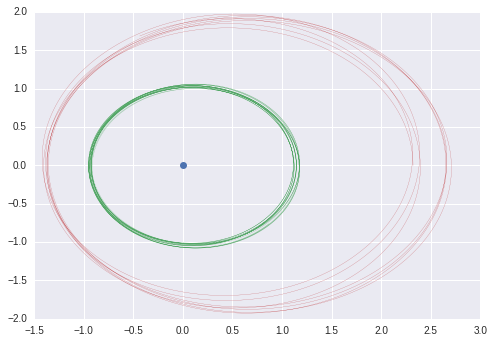

In [326]:
plt.plot([0],[0],'o')
plt.plot(sol[:,0],sol[:,2],linewidth=0.2)
plt.plot(sol[:,1],sol[:,3],linewidth=0.2)